# ACHR PLOTS FOR GRANT

In [325]:
%matplotlib widget   
%reload_ext autoreload
%autoreload 2

import numpy as np
import scipy
import pandas as pd
import tdt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import yaml
import re

import hypnogram as hp
from ecephys.utils import replace_outliers
import ecephys.plot as eplt
import ecephys.signal.timefrequency as tfr
import ecephys.signal.kd_utils as kd
import ecephys.signal.kd_plotting as kp
import ecephys.signal.kd_pax as kpx
import ecephys.xrsig.hypnogram_utils as xh
import tdt_xarray as tx

bands_def = dict(delta=(1.0, 4.0), theta=(4, 8), alpha=(8,13), sigma=(11,16), beta = (15, 30), low_gamma = (30, 55), high_gamma = (65, 100))

kd_ref = {}
kd_ref['echans'] = [1,2,3]
kd_ref['fchans']=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
#kd_ref['analysis_root'] = Path('/Volumes/opto_loc/Data/ACHR_PROJECT_MATERIALS/ACHR_2/ACHR_2-analysis-data')
#kd_ref['tank_root'] = Path('/Volumes/opto_loc/Data/ACHR_2_TANK')

In [289]:
def plot_bp(spg, channel, band_frange, start_time, end_time, ss=12, figsize=(22,6), title='', color='black'):
    spg = spg.sel(channel=channel, time=slice(start_time, end_time))
    bp = kd.get_bandpower(spg, band_frange)
    bp = kd.get_smoothed_da(bp, smoothing_sigma=ss)
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.lineplot(x=bp.time, y=bp, ax=ax, color=color, linewidth=2.0)
    ax.set_ylabel('Gamma (65-100Hz) Bandpower (uV²/Hz)')
    ax.set_xlabel('Time (s)')
    ax.set_title(title)
    plt.savefig('plot.png', dpi=300, bbox_inches='tight')
    return ax

In [81]:
def comp_psd(spg1, spg2, median=True, keys=keys, test=test):
    psd1 = spg1.median(dim='time')
    psd2 = spg2.median(dim='time')
    if median is not True: 
        psd1 = spg1.mean(dim='time')
        psd2 = spg2.mean(dim='time')
    psd_df = pd.concat([psd1.to_dataframe('power'), psd2.to_dataframe('power')], keys=keys).rename_axis(index={None: test})
    ax = sns.relplot(data=psd_df, x='frequency', y='power', hue='Condition', col='channel', kind='line')
    x = ax.axes
    x[0,0].set_ylim(0, 250)
    x[0,0].set_xlim(0, 120)
    return ax


## ACHR_2 Ex-1

In [5]:
x1p = '/Volumes/opto_loc/Data/ACHR_2/ACHR_2_TANK/ACHR_2-exp1'
b1p = '/Volumes/opto_loc/Data/ACHR_2/ACHR_2_TANK/test_recordings/ACHR_2-test-a6'
p1p = '/Volumes/opto_loc/Data/ACHR_2/ACHR_2_TANK/ACHR_2-exp1-post'


In [ ]:
a2x1 = {}
a2x1['e'], a2x1['espg'] = kd.get_data_spg(x1p, store='EEG_', t1=0, t2=0, channel=kd_ref['echans'])
a2x1['f'], a2x1['fspg'] = kd.get_data_spg(x1p, store='LFP_', t1=0, t2=0, channel=kd_ref['fchans'])


In [6]:
a2x1['be'], a2x1['bespg'] = kd.get_data_spg(b1p, store='EEG_', t1=0, t2=0, channel=kd_ref['echans'])
a2x1['bf'], a2x1['bfspg'] = kd.get_data_spg(b1p, store='LFP_', t1=0, t2=0, channel=kd_ref['fchans'])

read from t=0s to t=60899.34s
Using 1017.2526 Hz as SEV sampling rate for EEG_
Remember to save all data in xset-style dictionary, and to add experiment name key (key = "name") before using save_xset
read from t=0s to t=60899.34s
Using 1017.2526 Hz as SEV sampling rate for LFP_
Remember to save all data in xset-style dictionary, and to add experiment name key (key = "name") before using save_xset


In [ ]:
plt.close('all')
ax = plot_bp(a2x2['fspg'], channel=12, band_frange=(1.5,4), start_time=0, end_time=86400, ss=14, figsize=(25,4), title='Slow Wave Activity: 4-Hour Photoinhibition, 0.1mW (Deep LFP)')
ax.set_ylim(0,250000)
ax.axvspan(
        2803.79,
        16871.40,
        alpha=0.4,
        color='cornflowerblue',
        zorder=1000,
        ec="none",
    )
ax.axvspan(
        43200,
        86400,
        alpha=0.5,
        color='k',
        zorder=1000,
        ec="none",
    )

## ACHR_2 Ex-2

In [3]:
x2p = '/Volumes/opto_loc/Data/ACHR_2/ACHR_2_TANK/ACHR_2-exp2'
b2p = '/Volumes/opto_loc/Data/ACHR_2/ACHR_2_TANK/ACHR_2-exp2-bl'
p2p = '/Volumes/opto_loc/Data/ACHR_2/ACHR_2_TANK/ACHR_2-exp2-post'
a2x2 = {}
a2x2['e'], a2x2['espg'] = kd.get_data_spg(x2p, store='EEG_', t1=0, t2=0, channel=kd_ref['echans'])
a2x2['f'], a2x2['fspg'] = kd.get_data_spg(x2p, store='LFP_', t1=0, t2=0, channel=kd_ref['fchans'])
a2x2['be'], a2x2['bespg'] = kd.get_data_spg(b2p, store='EEG_', t1=0, t2=0, channel=kd_ref['echans'])
a2x2['bf'], a2x2['bfspg'] = kd.get_data_spg(b2p, store='LFP_', t1=0, t2=0, channel=kd_ref['fchans'])

read from t=0s to t=102476.04s
Using 1017.2526 Hz as SEV sampling rate for EEG_
Remember to save all data in xset-style dictionary, and to add experiment name key (key = "name") before using save_xset
read from t=0s to t=102476.04s
Using 1017.2526 Hz as SEV sampling rate for LFP_
Remember to save all data in xset-style dictionary, and to add experiment name key (key = "name") before using save_xset
read from t=0s to t=86459.88s
Using 1017.2526 Hz as SEV sampling rate for EEG_
Remember to save all data in xset-style dictionary, and to add experiment name key (key = "name") before using save_xset
read from t=0s to t=86459.88s
Using 1017.2526 Hz as SEV sampling rate for LFP_
Remember to save all data in xset-style dictionary, and to add experiment name key (key = "name") before using save_xset


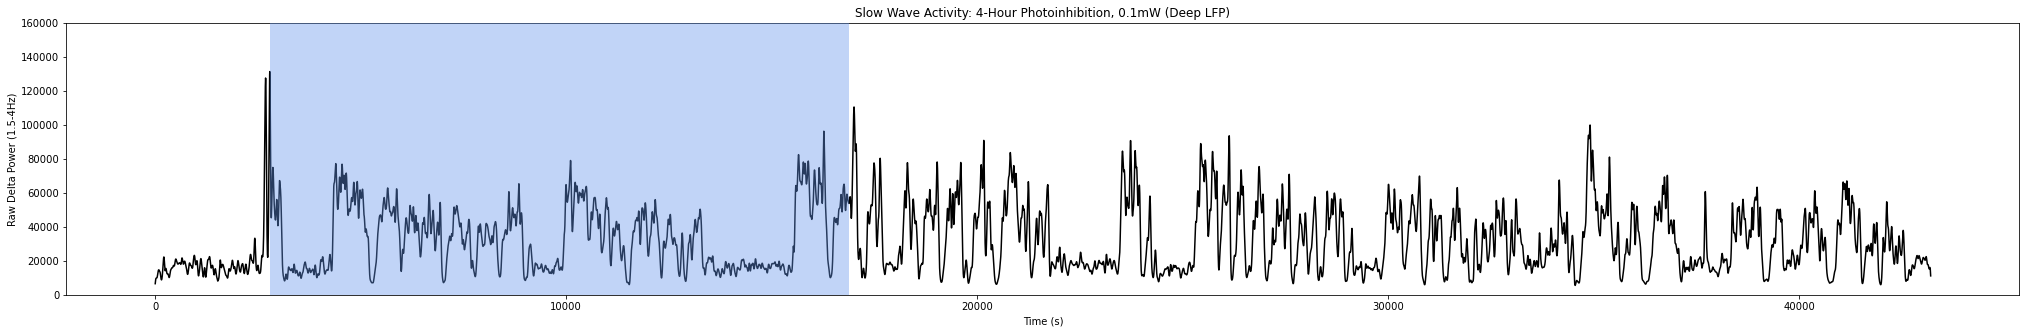

In [12]:
plt.close('all')
ax = plot_bp(a2x2['fspg'], channel=12, band_frange=(1.5,4), start_time=0, end_time=43200, ss=14, figsize=(35,5), title='Slow Wave Activity: 4-Hour Photoinhibition, 0.1mW (Deep LFP)')
ax.set_ylim(0,160000)
ax.axvspan(
        2803.79,
        16871.40,
        alpha=0.4,
        color='cornflowerblue',
        zorder=1000,
        ec="none",
    )

(0.0, 160000.0)

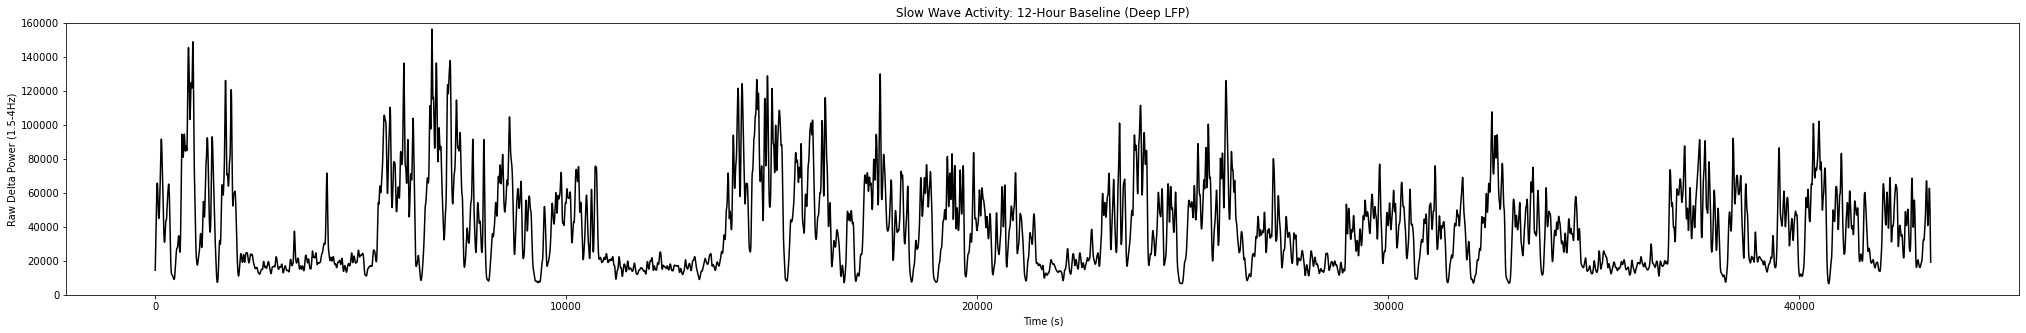

In [13]:
plt.close('all')
ax = plot_bp(a2x2['bfspg'], channel=12, band_frange=(1.5,4), start_time=0, end_time=43200, ss=14, figsize=(35,5), title='Slow Wave Activity: 12-Hour Baseline (Deep LFP)')
ax.set_ylim(0,160000)

# ACHR_2 Experiment 3

In [ ]:
/Volumes/opto_loc/Data/ACHR_PROJECT_MATERIALS/ACHR_2/plots/wake-pob-med.png

In [14]:
x3p = '/Volumes/opto_loc/Data/ACHR_2/ACHR_2_TANK/ACHR_2-exp3'
b3p = '/Volumes/opto_loc/Data/ACHR_2/ACHR_2_TANK/ACHR_2-exp3-bl'
p3p = '/Volumes/opto_loc/Data/ACHR_2/ACHR_2_TANK/ACHR_2-exp3-post'
a2x3 = {}
a2x3['e'], a2x3['espg'] = kd.get_data_spg(x3p, store='EEG_', t1=0, t2=0, channel=kd_ref['echans'])
a2x3['f'], a2x3['fspg'] = kd.get_data_spg(x3p, store='LFP_', t1=0, t2=0, channel=kd_ref['fchans'])
a2x3['be'], a2x3['bespg'] = kd.get_data_spg(b3p, store='EEG_', t1=0, t2=0, channel=kd_ref['echans'])
a2x3['bf'], a2x3['bfspg'] = kd.get_data_spg(b3p, store='LFP_', t1=0, t2=0, channel=kd_ref['fchans'])

read from t=0s to t=191466.87s
Using 1017.2526 Hz as SEV sampling rate for EEG_
Remember to save all data in xset-style dictionary, and to add experiment name key (key = "name") before using save_xset
read from t=0s to t=191466.87s
Using 1017.2526 Hz as SEV sampling rate for LFP_
Remember to save all data in xset-style dictionary, and to add experiment name key (key = "name") before using save_xset
read from t=0s to t=86458.84s
Using 1017.2526 Hz as SEV sampling rate for EEG_
Remember to save all data in xset-style dictionary, and to add experiment name key (key = "name") before using save_xset
read from t=0s to t=86458.84s
Using 1017.2526 Hz as SEV sampling rate for LFP_
Remember to save all data in xset-style dictionary, and to add experiment name key (key = "name") before using save_xset


In [188]:
def comp_psd_lfp(spg1, spg2, keys, test, chans, median=True):
    psd1 = spg1.sel(channel=chans).median(dim='time')
    psd2 = spg2.sel(channel=chans).median(dim='time')
    if median is not True: 
        psd1 = spg1.sel(channel=chans).mean(dim='time')
        psd2 = spg2.sel(channel=chans).mean(dim='time')
    psd_df = pd.concat([psd1.to_dataframe('power'), psd2.to_dataframe('power')], keys=keys).rename_axis(index={None: test})
    ax = sns.relplot(data=psd_df, x='frequency', y='power', hue='Condition', col='channel', kind='line', palette=['k', 'cornflowerblue'], height=8, aspect=1.2, linewidth=3.5)
    return psd1, psd2, ax

In [179]:
def plot_bp_set(spg, bands, hyp, channel, start_time, end_time, ss=12, figsize=(35,15), title=None, color='black'):
    spg = spg.sel(channel=channel, time=slice(start_time, end_time))
    bp_set = kd.get_bp_set2(spg, bands)
    bp_set = kd.get_smoothed_ds(bp_set, smoothing_sigma=ss)
    ax_index = np.arange(0, len(bands))
    keys = kd.get_key_list(bands)

    fig, axes = plt.subplots(ncols=1, nrows=len(bands), figsize=figsize)

    for i, k in zip(ax_index, keys):
        fr = bp_set[k].f_range
        fr_str = '('+str(fr[0]) + ' -> ' +str(fr[1])+' Hz)'
        ax = sns.lineplot(x=bp_set[k].time, y=bp_set[k], ax=axes[i], color=color, linewidth=2)
        ax.set_ylabel('Raw '+k.capitalize()+' Power')
        ax.set_title(k.capitalize()+' Bandpower '+fr_str)
    fig.suptitle(title)
    fig.tight_layout(pad=1)
    return fig, axes

In [226]:
xwake_times = (10750, 12700)
bwake_times = (0,1650)

In [370]:
# Get hypnogram-filtered spectrogram
x3hyp = hp.load_visbrain_hypnogram('/Volumes/opto_loc/Data/ACHR_PROJECT_MATERIALS/ACHR_2/hypnograms/ACHR_2-exp3-hypno.txt').as_datetime(a2x3['fspg'].datetime.values.min())
x_wake_clean = xh.keep_states(x_laser, x3hyp, states=['Wake'])

In [ ]:
# Get hypnogram-filtered spectrogram
x3hyp = hp.load_visbrain_hypnogram('/Volumes/opto_loc/Data/ACHR_PROJECT_MATERIALS/ACHR_2/hypnograms/ACHR_2-exp3-hypno-picky.txt').as_datetime(a2x3['fspg'].datetime.values.min())
x_wake_picky = xh.keep_states(x_laser, x3hyp, states=['Wake'])

In [332]:
# Get rem-only spectrograms
x3hyp_rem = hp.load_visbrain_hypnogram('/Volumes/opto_loc/Data/ACHR_PROJECT_MATERIALS/ACHR_2/hypnograms/ACHR_2-exp3-hypno-picky-rem.txt').as_datetime(a2x3['fspg'].datetime.values.min())
x_rem = xh.keep_states(x_laser, x3hyp_rem, states=['REM'])

In [334]:
# Get rem-only spectrograms
b3hyp_rem = hp.load_visbrain_hypnogram('/Volumes/opto_loc/Data/ACHR_PROJECT_MATERIALS/ACHR_2/hypnograms/ACHR_2-exp3-bl-rem-hypno.txt').as_datetime(a2x3['bfspg'].datetime.values.min())
bl_rem = xh.keep_states(bl_laser, b3hyp_rem, states=['REM'])

In [372]:
# get the laser-alligned data for baseline and exp
bl_laser = a2x3['bfspg'].sel(time=slice(2355, 20421))
x_laser = a2x3['fspg'].sel(time=slice(2355, 20421)) 

In [364]:
# get the wake spectrograms for baseline and exp.
bl_wake = a2x3['bfspg'].sel(time=slice(0,1650))
x_wake = a2x3['fspg'].sel(time=slice(10750, 12700)) 
bl_wake2 = a2x3['fspg'].sel(time=slice(0, 2000)) 

In [349]:
# pob median-psd comps
xpob_psd = (xpsd/bpsd)*100
pd_psd = xpob_psd.to_dataframe('Power')

In [350]:
# pob mean psd comps
xpob_mean_psd = (xmn_psd/bmn_psd)*100
pd_mean_psd = xpob_mean_psd.to_dataframe('Power')

In [290]:
# Exp Bandpower Plots
plt.close('all')
chans = [12]
for chan in chans: 
    ax = plot_bp(a2x3['fspg'], channel=chan, band_frange=(1,4), start_time=0, end_time=43200, ss=14, figsize=(30,5), color='mediumblue', title='High-Frequency Activity During 5-Hour Photoinhibition | 0.1mW Laser Power | Deep LFP')
    #ax.set_ylim(0,2000)
    ax.axvspan(
            2355.13,
            20421.34,
            alpha=0.2,
            color='blue',
            zorder=1000,
            ec="none",
        )
    ax.axvspan(
            10750,
            12700,
            alpha=0.3,
            color='firebrick',
            zorder=1000,
            ec="none",
        )

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [243]:
# Baseline Bandpower Plots
plt.close('all')
chans = [12]
for chan in chans: 
    ax = plot_bp(a2x3['bfspg'], channel=chan, band_frange=(1,4), start_time=0, end_time=43200, ss=14, figsize=(30,5), title='High-Frequency Activity Baseline | 10am-10pm (Light Cycle) | Deep LFP')
    #ax.set_ylim(0,2000)
    ax.axvspan(
            0,
            1650,
            alpha=0.3,
            color='firebrick',
            zorder=1000,
            ec="none",
        )

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [374]:
# Mean PSD Comp - slow
fkeys2 = ['Baseline', 'Experiment']
test2 = 'Condition'
chans2 = [12]
plt.close('all')
bmn_psd, xmn_psd, ax = comp_psd_lfp(bl_laser, x_laser, keys=fkeys2, test=test2, chans=chans2, median=False)
x = ax.axes
x[0,0].set_ylim(1, 10000)
x[0,0].set_title('Deep-LFP Mean PSD Comparison (Full Experiment)')
x[0,0].set_ylabel('Power (uV²/Hz)')
x[0,0].set_xlabel('Frequency')
x[0,0].set_yscale('log')
x[0,0].set_xscale('log')
x[0,0].set_xlim(0, 55)
plt.savefig('/Volumes/opto_loc/Data/ACHR_PROJECT_MATERIALS/ACHR_2/plots/auto_plots/mean-laser-log.png')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/tmp/ipykernel_2925276/2824000762.py:14: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  x[0,0].set_xlim(0, 55)


In [345]:
# Median PSD Comp - slow
fkeys2 = ['Baseline', 'Experiment']
test2 = 'Condition'
chans2 = [12]
plt.close('all')
bpsd, xpsd, ax = comp_psd_lfp(bl_rem, x_rem, keys=fkeys2, test=test2, chans=chans2)
x = ax.axes
#x[0,0].set_ylim(0.1, 8000)
x[0,0].set_title('Deep-LFP Median PSD Comparison (REM-ONLY)')
x[0,0].set_ylabel('Power (uV²/Hz)')
x[0,0].set_xlabel('Frequency')
x[0,0].set_yscale('log')
x[0,0].set_xscale('log')
x[0,0].set_xlim(0,55)
plt.savefig('/Volumes/opto_loc/Data/ACHR_PROJECT_MATERIALS/ACHR_2/plots/auto_plots/med-rem-wide-log.png')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/tmp/ipykernel_2925276/1371178680.py:14: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  x[0,0].set_xlim(0,55)


Text(0.5, 20.80000000000001, 'Frequency')

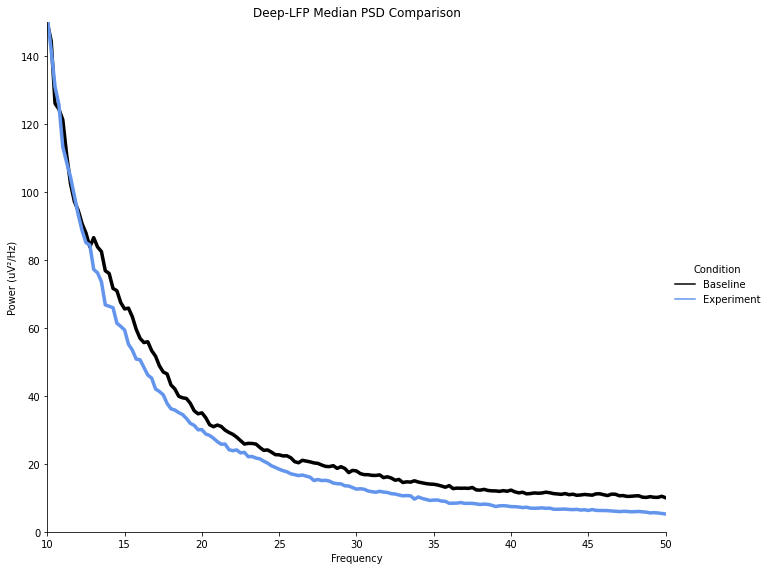

In [150]:
# Median PSD Comp - mid
fkeys2 = ['Baseline', 'Experiment']
test2 = 'Condition'
chans2 = [12]
plt.close('all')
ax = comp_psd_lfp(bl_laser, x_laser, keys=fkeys2, test=test2, chans=chans2)
x = ax.axes
x[0,0].set_ylim(0, 150)
x[0,0].set_xlim(10, 50)
x[0,0].set_title('Deep-LFP Median PSD Comparison')
x[0,0].set_ylabel('Power (uV²/Hz)')
x[0,0].set_xlabel('Frequency')

Text(0.5, 20.80000000000001, 'Frequency')

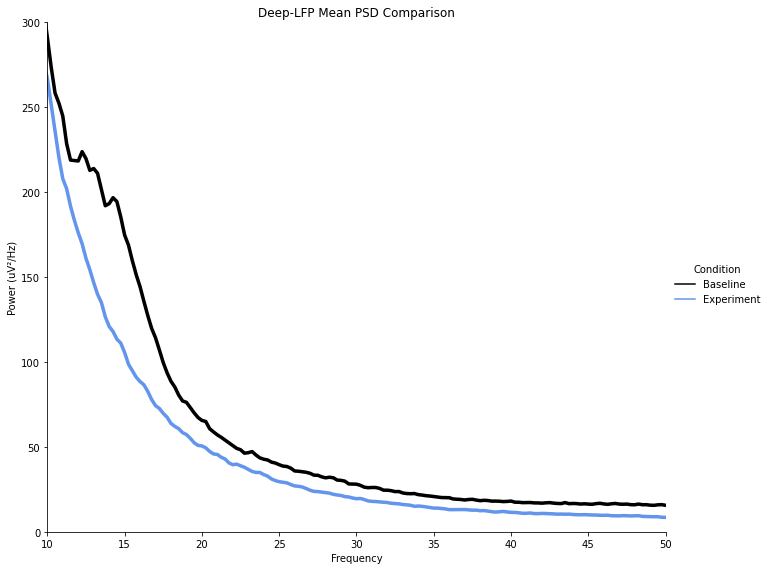

In [151]:
# Mean PSD Comp - mid
fkeys2 = ['Baseline', 'Experiment']
test2 = 'Condition'
chans2 = [12]
plt.close('all')
ax = comp_psd_lfp(bl_laser, x_laser, keys=fkeys2, test=test2, chans=chans2, median=False)
x = ax.axes
x[0,0].set_ylim(0, 300)
x[0,0].set_xlim(10, 50)
x[0,0].set_title('Deep-LFP Mean PSD Comparison')
x[0,0].set_ylabel('Power (uV²/Hz)')
x[0,0].set_xlabel('Frequency')

Text(0.5, 20.80000000000001, 'Frequency')

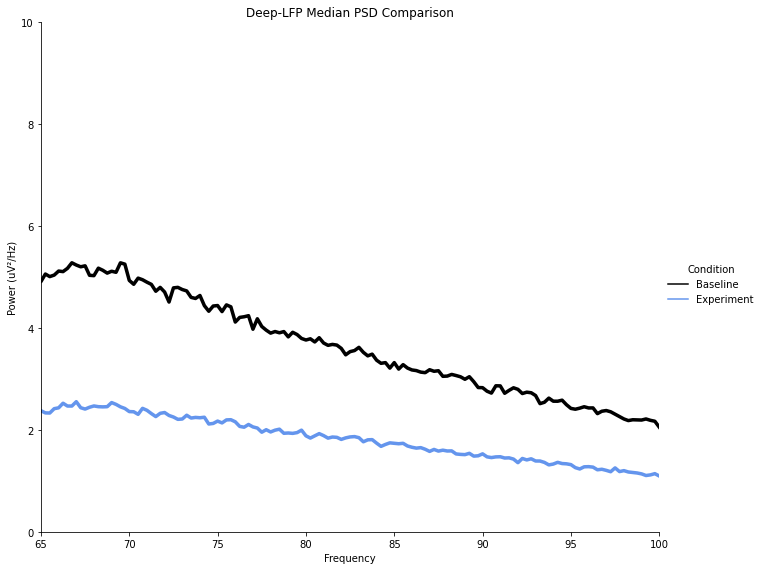

In [152]:
# Median PSD Comp - fast
fkeys2 = ['Baseline', 'Experiment']
test2 = 'Condition'
chans2 = [12]
plt.close('all')
ax = comp_psd_lfp(bl_laser, x_laser, keys=fkeys2, test=test2, chans=chans2)
x = ax.axes
x[0,0].set_ylim(0, 10)
x[0,0].set_xlim(65, 100)
x[0,0].set_title('Deep-LFP Median PSD Comparison')
x[0,0].set_ylabel('Power (uV²/Hz)')
x[0,0].set_xlabel('Frequency')

Text(0.5, 20.80000000000001, 'Frequency')

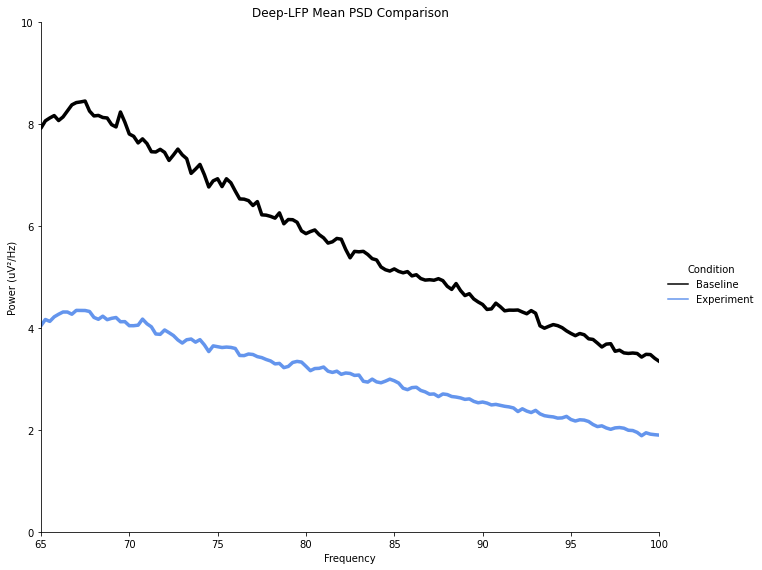

In [153]:
# Mean PSD Comp - fast
fkeys2 = ['Baseline', 'Experiment']
test2 = 'Condition'
chans2 = [12]
plt.close('all')
ax = comp_psd_lfp(bl_laser, x_laser, keys=fkeys2, test=test2, chans=chans2, median=False)
x = ax.axes
x[0,0].set_ylim(0, 10)
x[0,0].set_xlim(65, 100)
x[0,0].set_title('Deep-LFP Mean PSD Comparison')
x[0,0].set_ylabel('Power (uV²/Hz)')
x[0,0].set_xlabel('Frequency')

In [357]:
# median POB plots
f, ax = plt.subplots(figsize=(20,12))
ax = sns.lineplot(data=pd_psd, x='frequency', y='Power', ax=ax, linewidth=3, color='mediumblue')
ax.set(xscale="linear", xlim=(0,55), ylim=(0,130), xlabel='Frequency', ylabel='Power as % of Baseline Median', title='Stimulation Median REM-PSD as a Percentage of Baseline Median REM-PSD')
ax.axhline(y=100, color='firebrick')
plt.savefig('/Volumes/opto_loc/Data/ACHR_PROJECT_MATERIALS/ACHR_2/plots/auto_plots/median_mean-rem.png')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [358]:
# Mean POB plots
f, ax = plt.subplots(figsize=(20,12))
ax = sns.lineplot(data=pd_mean_psd, x='frequency', y='Power', ax=ax, linewidth=3, color='mediumblue')
ax.set(xscale="linear", xlim=(0,55), ylim=(0,130), xlabel='Frequency', ylabel='Power as % of Baseline Mean', title='Stimulation Mean REM-PSD as a Percentage of Baseline Mean REM-PSD')
ax.axhline(y=100, color='firebrick')
plt.savefig('/Volumes/opto_loc/Data/ACHR_PROJECT_MATERIALS/ACHR_2/plots/auto_plots/mean-rem.png')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

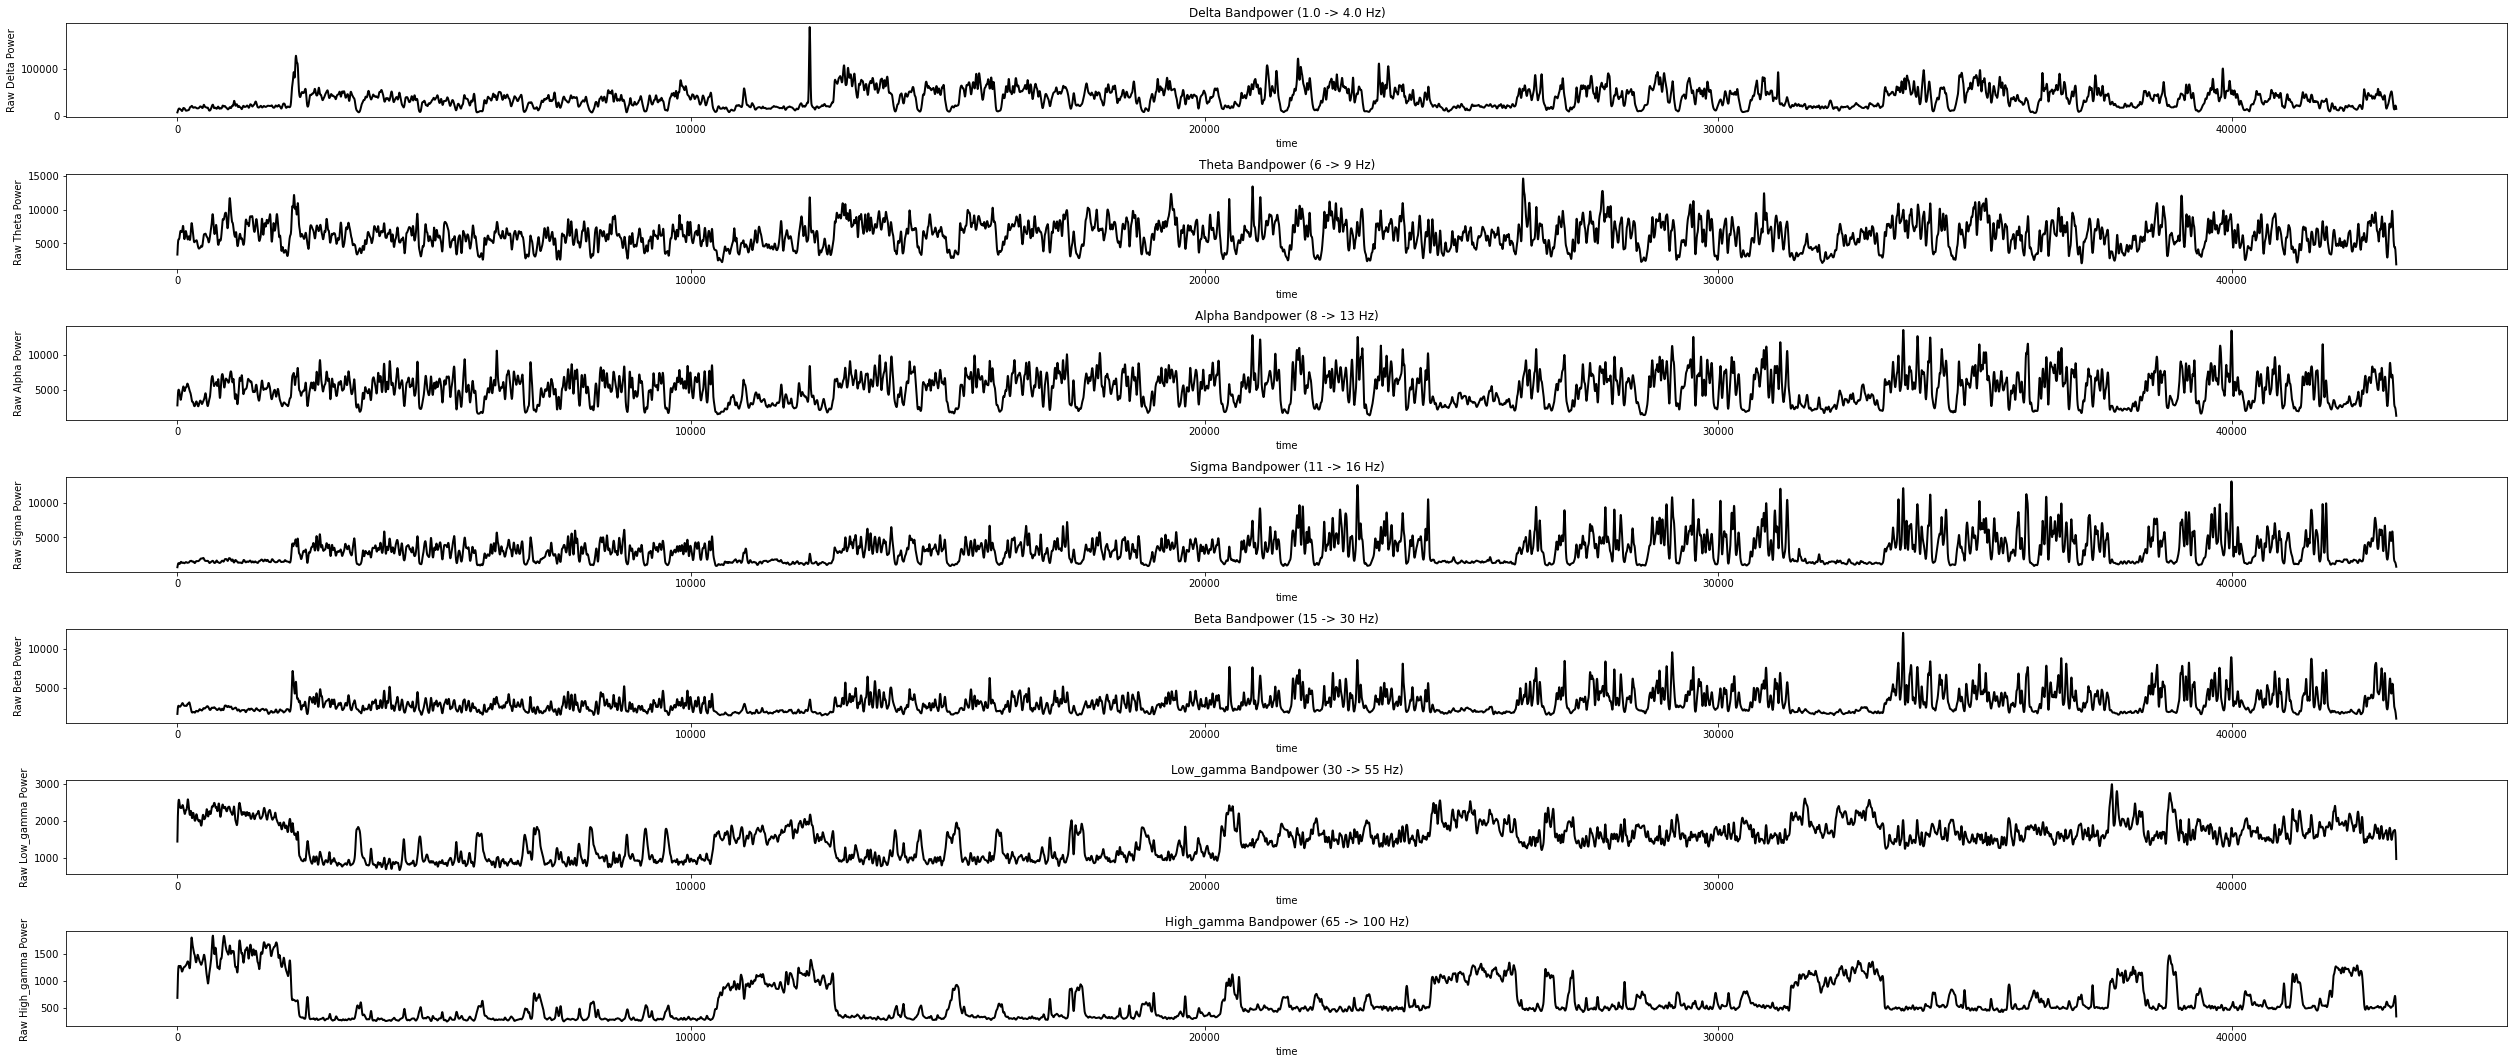

In [183]:
f, axe = plot_bp_set(a2x3['fspg'], bands_def, hyp=None, channel=12, start_time=0, end_time=43200)

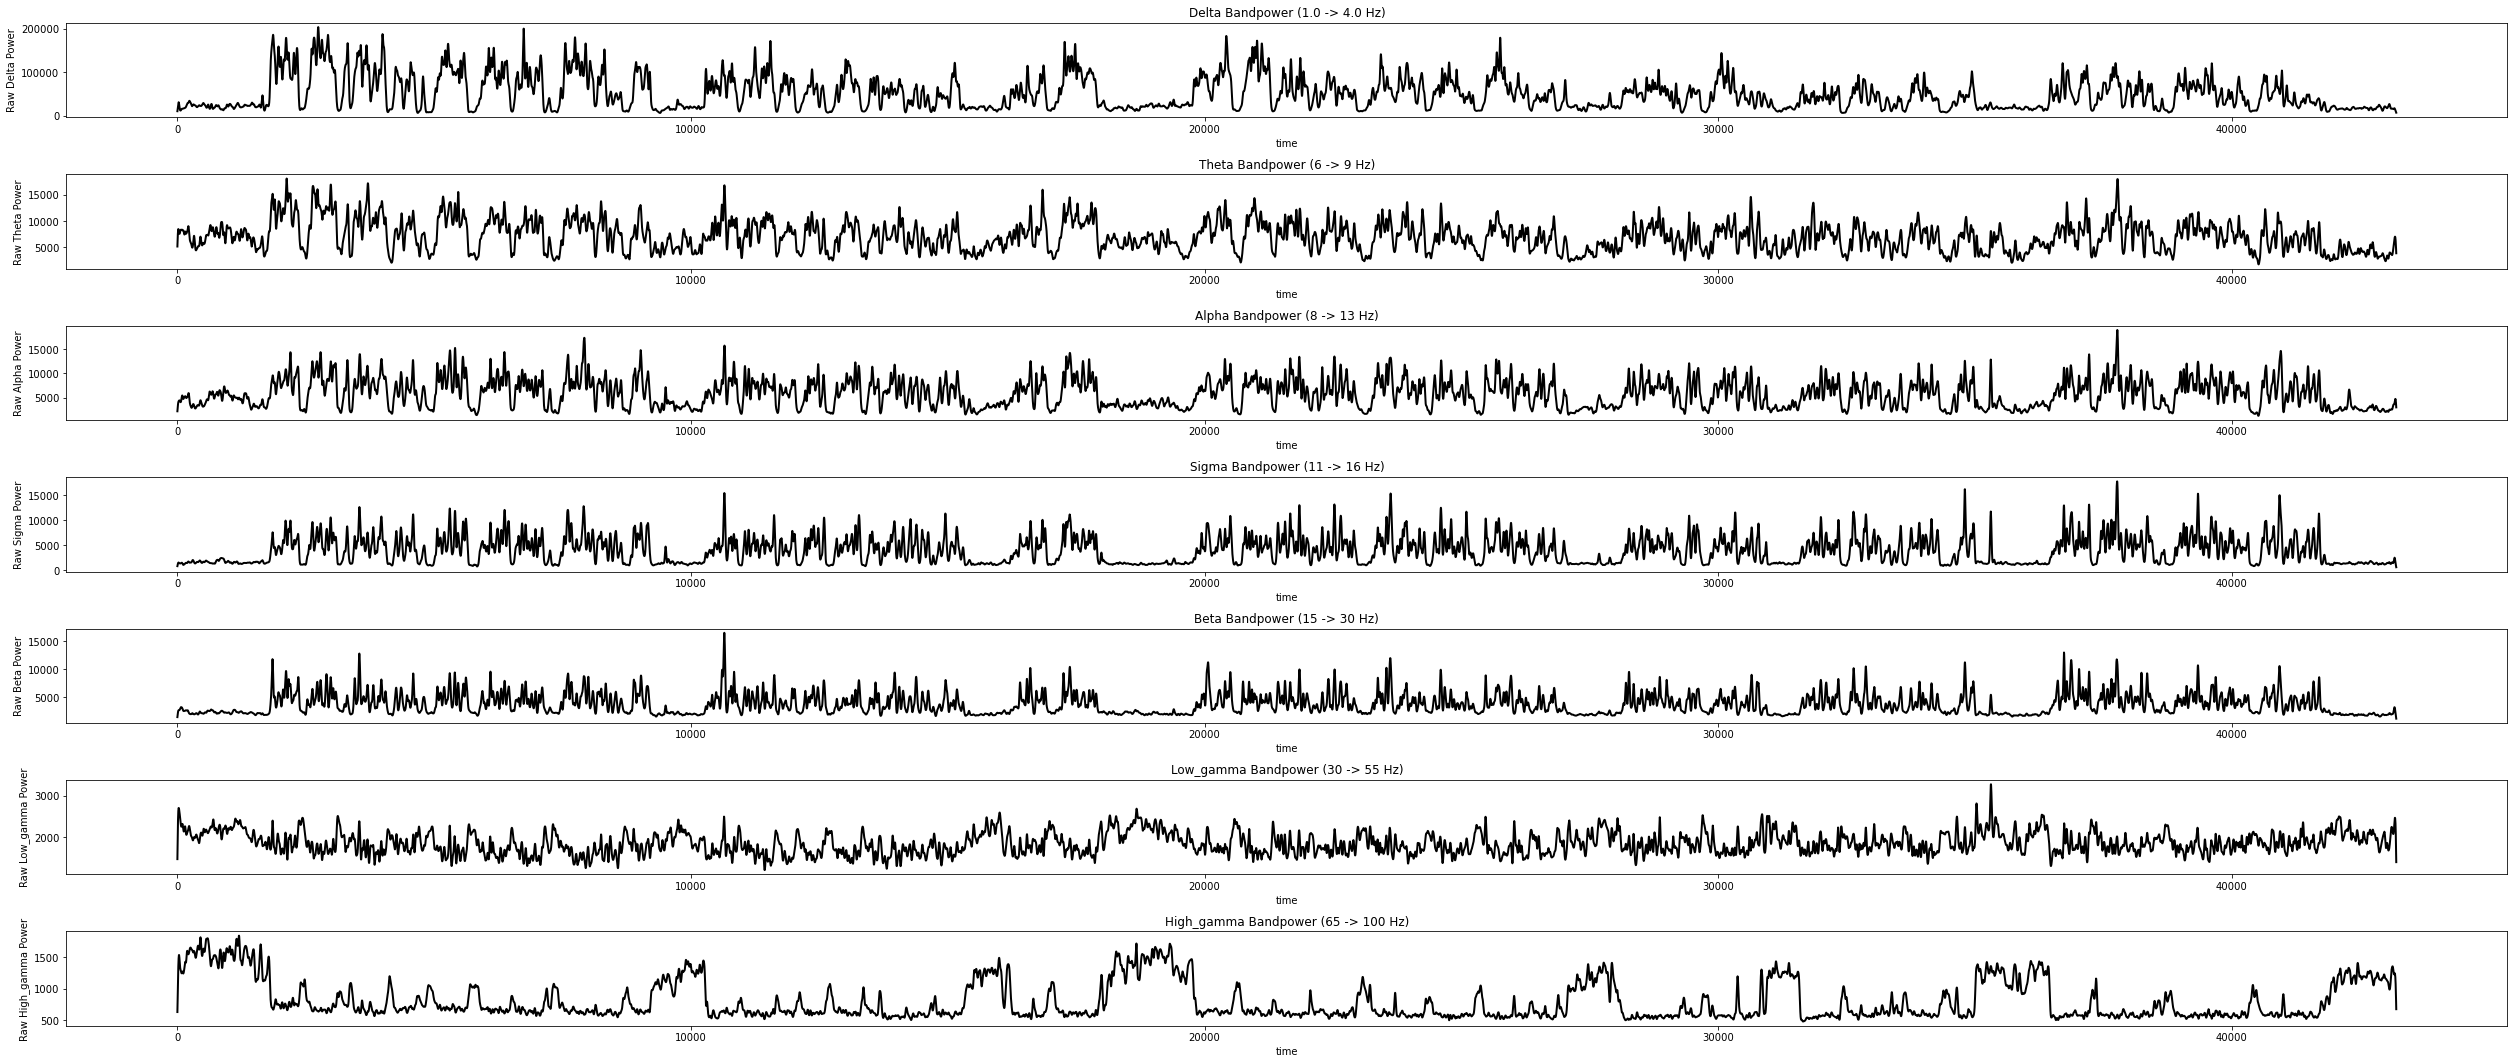

In [184]:
f, axe = plot_bp_set(a2x3['bfspg'], bands_def, hyp=None, channel=12, start_time=0, end_time=43200)